In [5]:
import numpy as np
from numpy import linalg as lin
import random as rn
from pyvis.network import Network

import matplotlib.pyplot as plt

In [6]:
def ER_adj_matrix(N,p):
    A = np.zeros((N,N), dtype=int)
    for i in range(N):
        for j in range(i):
            if rn.random() < p:
                A[i][j] = 1
                A[j][i] = 1
    return A

In [7]:
#random non symmetric with n, p
def random_adj_matrix(N,p):
    A = np.zeros((N,N), dtype=int)
    for i in range(N):
        for j in range(N):
            if rn.random() < p and i!=j:
                A[i][j] = 1
    return A

In [8]:
# Given a matrix, we wont to extract only the symmetric, and non-zero components, i.e. aij > 0 such that aji = aij
# we are assuming aij = 0,1 only

def symmetric_components(matrix):
    # First, we select its upper and lower triangles
    Au = np.triu(matrix)
    Al = np.tril(matrix)
    # We now transpose Al
    AlT = np.transpose(Al)
    # we now only retain non-zero components in Au that are non-zero also in AlT
    Su = np.multiply(Au,AlT) # this is the element-wise product
    # we now build the result
    As = Su + np.transpose(Su)
    return As

def symmetric_components_v2(matrix):
    return np.multiply(A,np.transpose(A))

## Triad 1

In [5]:
def triad_1(matrix):
    A = matrix
    AT = np.transpose(A)
    ATA = np.dot(AT,A)
    t1 = (np.sum(ATA) - np.trace(ATA))/2
    return t1

## Triad 2

In [6]:
def triad_2(matrix):
    A = matrix
    AT = np.transpose(A)
    AAT = np.dot(A,AT)
    t2 = (np.sum(AAT) - np.trace(AAT))/2
    return t2

## Triad 3

In [7]:
def triad_3(matrix):
    A = matrix
    A2 = lin.matrix_power(A, 2)
    t3 = np.sum(A2)-np.trace(A2)
    return t3

## Triad 4

In [8]:
def triad_4(matrix):
    A = matrix
    A2 = lin.matrix_power(A, 2)
    D2 = np.diag(np.diag(A2))
    As = symmetric_components(A)
    t4 = np.sum(np.dot(A,D2)-As)
    return t4

## Triad 5

In [9]:
def triad_5(matrix):
    A = matrix
    AT = np.transpose(A)
    A2 = lin.matrix_power(A, 2)
    D2 = np.diag(np.diag(A2))
    As = symmetric_components(A)
    t5 = np.sum(np.dot(AT,D2)-As)
    return t5

## Triad 6

In [10]:
def triad_6(matrix):
    A = matrix
    A2 = lin.matrix_power(A, 2)
    D2 = np.diag(np.diag(A2))
    As = symmetric_components(A)
    As2 = lin.matrix_power(As, 2)
    t6 = np.sum(As2-D2)/2
    return t6

## Triad 7

In [11]:
def triad_7(matrix):
    A = matrix
    A2 = lin.matrix_power(A, 2)
    t7 = np.sum(np.multiply(A2,A))
    return t7

## Triad 8

In [12]:
def triad_8(matrix):
    A = matrix
    A3 = lin.matrix_power(A, 3)
    D3 = np.diag(np.diag(A3))
    t8 = np.sum(D3)/3
    return t8

## Triad 9

In [13]:
def triad_9(matrix):
    A = matrix
    AT = np.transpose(A)
    ATA = np.dot(AT,A)
    As = symmetric_components(A)
    t9 = np.sum((  np.multiply( ATA , As   )) )/2
    return t9

## Triad 10

In [14]:
def triad_10(matrix):
    A = matrix
    AT = np.transpose(A)
    AAT = np.dot(A,AT)
    As = symmetric_components(A)
    t10 = np.sum((  np.multiply( AAT , As)   ) )/2
    return t10

## Triad 11

In [15]:
def triad_11(matrix):
    A = matrix
    As = symmetric_components(A)
    A2 = lin.matrix_power(A, 2)
    t11 = np.sum(np.multiply(A2,As))
    return t11

## Triad 12

In [16]:
def triad_12(matrix):
    A = matrix
    As = symmetric_components(A)
    As2 = lin.matrix_power(As, 2)
    t12 = np.sum(np.multiply(As2,A))
    return t12

## Triad 13

In [17]:
def triad_13(matrix):
    A = matrix
    As = symmetric_components(A)
    As3 = lin.matrix_power(As, 3)
    t13 = np.trace(As3)/6
    return t13

## Triad Census

In [45]:
import numpy as np
from numpy import linalg as lin

def triad_census(matrix):
    
    A   = matrix
    At  = np.transpose(A)
    AtA = np.dot(At,A)
    AAt = np.dot(A,At)    
    A2  = lin.matrix_power(A, 2)
    D2  = np.diag(np.diag(A2))
    As  = np.multiply(A,np.transpose(A))
    As2 = lin.matrix_power(As, 2)    
    A3  = lin.matrix_power(A, 3)
    D3  = np.diag(np.diag(A3))   
    As3 = lin.matrix_power(As, 3)
    
    t = np.zeros(13) # t[0] is the count for triad 1, etc.
    
    t[0]  = (np.sum(AtA) - np.trace(AtA))/2
    t[1]  = (np.sum(AAt) - np.trace(AAt))/2
    t[2]  = np.sum(A2)-np.trace(A2)
    t[3]  = np.sum(np.dot(A,D2)-As)
    t[4]  = np.sum(np.dot(At,D2)-As)
    t[5]  = (np.sum(As2)-np.trace(As2))/2
    t[6]  = np.sum(np.multiply(A2,A))
    t[7]  = np.sum(D3)/3
    t[8]  = np.sum((np.multiply(AtA,As)))/2
    t[9]  = np.sum((np.multiply(AAt,As)))/2
    t[10] = np.sum(np.multiply(A2,As))
    t[11] = np.sum(np.multiply(As2,A))
    t[12] = np.trace(As3)/6
    
    return t.astype(int)

## Examples

In [46]:
#example

A = [
    [0,1,1,0],
    [1,0,1,0],
    [1,1,0,0],
    [0,1,0,0],
]

Tp = triad_census(A)
Tp

array([3, 5, 8, 8, 6, 3, 6, 2, 3, 3, 6, 6, 1])

In [47]:
[3, 5, 8, 8, 6, 3, 6, 2, 3, 3, 6, 6, 1]

[3, 5, 8, 8, 6, 3, 6, 2, 3, 3, 6, 6, 1]

In [48]:
A = [[0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 1, 0, 1, 0, 0, 1, 1, 1],
       [1, 1, 0, 1, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0]]

In [49]:
triad_census(A)

array([ 60,  61, 124,  49,  46,   8,  52,  19,  10,  11,  22,   9,   1])

In [50]:
[ 60,  61, 124,  49,  46,   8,  52,  19,  10,  11,  22,   9,   1]

[60, 61, 124, 49, 46, 8, 52, 19, 10, 11, 22, 9, 1]

[ 89.56  90.38 178.24  84.88  84.38  19.7   90.    29.32  21.2   21.5
  42.    19.72   1.46]


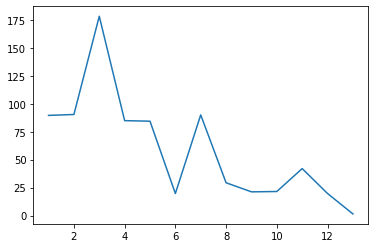

In [51]:
m = 50
n = len(A)
#p = np.sum(A)/(n**2)
#n = 10
p = .5
census = np.zeros(13)
for i in range(m):
    matrix = random_adj_matrix(n,p)
    census = census + triad_census(matrix)
avg_census = census/m
print(avg_census)
t = range(1,14)
plt.plot(t,avg_census);

In [21]:
Tp/avg_census

array([ 1.14503817,  1.8115942 ,  1.38408304,  2.77777778,  2.18978102,
        3.57142857,  2.17391304,  1.96078431,  4.05405405,  4.05405405,
        3.75      ,  6.25      , 10.        ])

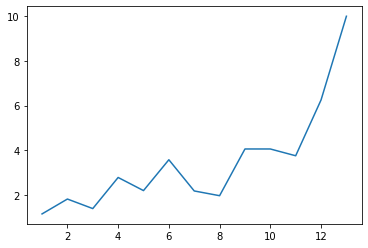

In [22]:
plt.plot(t,Tp/avg_census);

[[0 1 0 1 0 0 1 1]
 [1 0 0 1 0 0 1 0]
 [1 1 0 0 0 0 0 1]
 [1 1 0 0 0 0 0 0]
 [1 0 0 0 0 1 1 1]
 [0 1 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1]
 [0 0 1 1 0 0 0 0]]

[21 28 44 20 15  3 17  4  4  4  8  6  1]



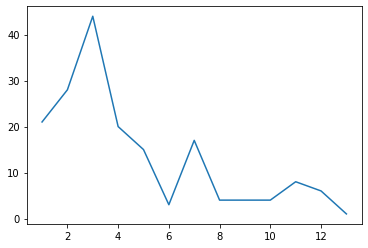

In [26]:
matrix = random_adj_matrix(8,.3)
census = triad_census(matrix)
print(matrix)
print('')
print(census)
print('')
plt.plot(t,census);

In [24]:
g = Network(notebook = True,directed=True)
#g.set_options('{"layout": {"randomSeed":0}}')
for i in range(len(matrix)):
    g.add_node(i,size=10,color='black')
for i in range(len(matrix)):
    for j in range(len(matrix)):
        if matrix[i][j] == 1:
            g.add_edge(i, j)
g.show("network.html")

In [32]:
#matrix I sent to Shade

[[0, 1, 0, 1, 0, 0, 1, 1],
[1, 0, 0, 1, 0, 0, 1, 0],
[1, 1, 0, 0, 0, 0, 0, 1],
[1, 1, 0, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 1, 1, 1],
[0, 1, 0, 0, 0, 0, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1],
[0, 0, 1, 1, 0, 0, 0, 0]]

# My triad counts
[21, 28, 44, 20, 15,  3, 17,  4,  4,  4,  8,  6,  1]

[21, 28, 44, 20, 15, 3, 17, 4, 4, 4, 8, 6, 1]